In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
taxi=pd.read_csv("E:/imarticus/excels/TaxiFare/TaxiFare.csv")
taxi.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
taxi.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [4]:
taxi.no_of_passenger.value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [5]:
taxi.shape

(50000, 8)

In [6]:
taxi.drop(taxi[taxi["no_of_passenger"]==0].index,axis=0,inplace=True)

In [7]:
taxi.shape

(49835, 8)

In [8]:
taxi.no_of_passenger.value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
Name: no_of_passenger, dtype: int64

In [9]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
taxi['distance'] = taxi[["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"]].apply(haversine,axis=1)


In [10]:
taxi.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [11]:
taxi.amount.describe()

count    49835.000000
mean        11.370626
std          9.694397
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x17873994af0>,
 'caps': [<matplotlib.lines.Line2D at 0x178731e1190>,
 'boxes': [<matplotlib.lines.Line2D at 0x178739946a0>],
 'medians': [<matplotlib.lines.Line2D at 0x178731e18b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x178731e1c40>],
 'means': []}

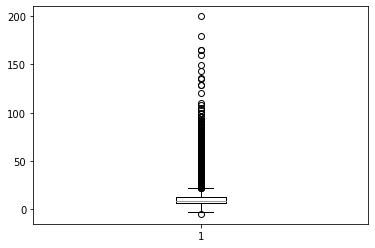

In [12]:
plt.boxplot(taxi.amount)

In [13]:
taxi.amount[taxi.amount<0]=0

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_16300/1166371895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi.amount[taxi.amount<0]=0


In [14]:
taxi.drop(taxi[taxi["no_of_passenger"]==0].index,axis=0,inplace=True)

In [15]:
taxi.drop(["unique_id","date_time_of_pickup"],axis=1,inplace=True)

In [16]:
y=taxi.amount
x=taxi.drop("amount",axis=1)

In [18]:
X1=pd.get_dummies(x)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [21]:
x= pd.DataFrame(scaled_data)

In [32]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
print("SCORE=",model.score(x_test,y_test))
y_predicted=model.predict(x_test)
print("RMSE=",mean_squared_error(y_test,y_predicted,squared=False))


SCORE= 0.6552403210994204
RMSE= 5.829693897643587


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
'''kf= KFold(n_splits=10).get_n_splits(x_train)
model1 = RandomForestRegressor()
cross_val_score(model1, x_test, y_test, cv=kf,)'''

array([0.66110657, 0.6957727 , 0.4805101 , 0.65361456, 0.74222527,
       0.4611931 , 0.77773669, 0.72271821, 0.59940872, 0.59942158])

<h2>GRID SEARCH CV</h2>

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
rfr= RandomForestRegressor(random_state = 42)
param_grid = { 'n_estimators': [200,300,500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8]}

In [30]:
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [31]:
CV_rfr.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}

In [33]:
rfrf=GradientBoostingRegressor(random_state=42, max_features='auto', n_estimators= 500, max_depth=4)
rfrf.fit(x_train, y_train)
print("SCORE=",rfrf.score(x_test,y_test))
y_predicted=rfrf.predict(x_test)
print("RMSE=",mean_squared_error(y_test,y_predicted,squared=False))


SCORE= 0.6956903112335988
RMSE= 5.477033632963029
